In this notebook we are going to discuss how to view a image in a full scale and recognize face,smile and eye detection in a single go 

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Here we are going to load the Classfiers which are written in xml format. I will discuss how to write owr own cascading classifiers in next notebook.

For the facial recognition purposes download the casacade files from opencv github site. Link for the cascading's is given below
https://github.com/Itseez/opencv/blob/master/data/haarcascades/
Get the necessary cascading you need for the classifier you want to detect. For this tutorial I have use eye,face and smile cascades to detect eye, face and smile for a image or a video

In [3]:
eye_cascade = cv2.CascadeClassifier(r'C:\Users\jatoth.kumar\Downloads\haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(r'C:\Users\jatoth.kumar\Downloads\haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(r'C:\Users\jatoth.kumar\Downloads\haarcascade_smile.xml')

Here we are loading the video in a full screen mode. For full screen we just name the window prior and resize the window with this window name

In [5]:
window_name = 'display'
cap = cv2.VideoCapture(0)
cv2.namedWindow(window_name,cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty(window_name,cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)
cap.release()
cv2.destroyAllWindows()

Now we are all set to record the live video from your camera attached by default. If you want to change your camera change the capture to the following

-> cap = cv2.VideoCapture(1)  

If we press the esc key it will exit the video sharing

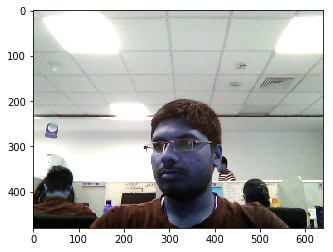

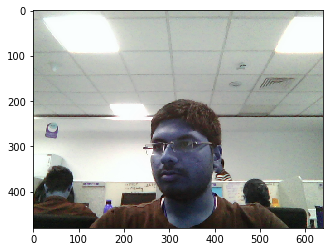

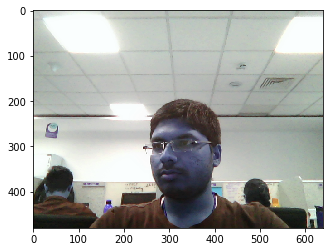

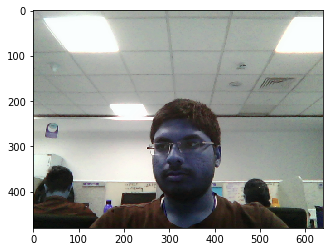

In [14]:
cap = cv2.VideoCapture(0)
cv2.namedWindow(window_name,cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty(window_name,cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)
while(1):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow(window_name,frame)
    plt.imshow(frame)
    plt.show()
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

Now we are going to do facial recognition. Just load the face_cascade which we are defined earlier and plot a rectangle along the face detected. The following code will pop up a window in a full screen mode and detect faces in the video in live

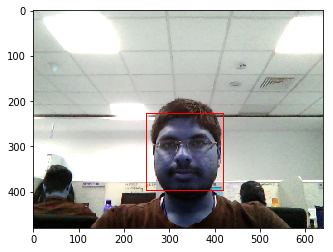

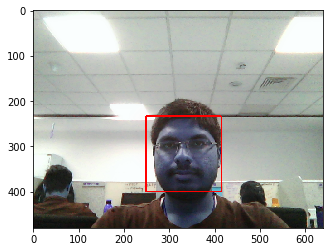

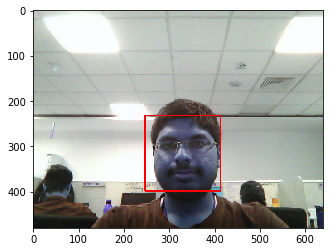

In [15]:
cap = cv2.VideoCapture(0)
cv2.namedWindow(window_name,cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty(window_name,cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)
while(1):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow(window_name,frame)
    plt.imshow(frame)
    plt.show()
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

we have done with the facial recognition now we are heading towards detecting eyes and smile in a real video feed

After detecting a face we are now sure that eyes and lips will be in the same rectangle which we have plotted. So we will not traverse the entire image. we will just traverse the rectangle which was detected as face and recognize eyes and smile.

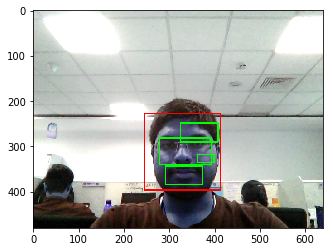

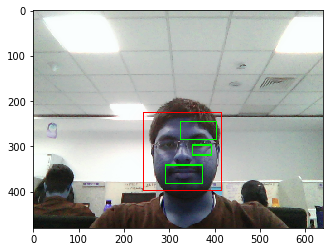

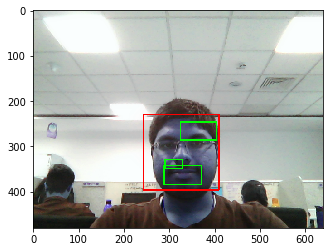

In [16]:
cap = cv2.VideoCapture(0)
cv2.namedWindow(window_name,cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty(window_name,cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)
while(1):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        smile = smile_cascade.detectMultiScale(roi_gray)
        for(ex,ey,ew,eh) in smile:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2.imshow(window_name,frame)
    plt.imshow(frame)
    plt.show()
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

That's it we have done facial recognition, eyes and smile detection in this tutorial.